In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))
#os.getcwd()
#os.chdir("../input")
# Any results you write to the current directory are saved as output.

 ### <font color="Red" size=4>" Importing all the packages for implementing the models"</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

In [3]:
df_train= pd.read_csv("train.csv")
df_sample= pd.read_csv("sample_submission.csv")
df_test= pd.read_csv("test.csv")

print("The no of rows in train datasets is {} and columns is {}".format(df_train.shape[0],df_train.shape[1]))
print("The no of rows in test datasets is {} and columns is {}".format(df_test.shape[0],df_test.shape[1]))

The no of rows in train datasets is 1032991 and columns is 3
The no of rows in test datasets is 56370 and columns is 2


## <font color="Red"> Exploratory Data Analysis of Datasets</font>

* ### <font color="orange">Checking if there is missing value in the datasets</font>

In [4]:
df_train.isnull().sum() # There is no missing value in the train datasets.Good to go!!

qid              0
question_text    0
target           0
dtype: int64

### Description of the datasets types

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032991 entries, 0 to 1032990
Data columns (total 3 columns):
qid              1032991 non-null object
question_text    1032991 non-null object
target           1032991 non-null int64
dtypes: int64(1), object(2)
memory usage: 23.6+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56370 entries, 0 to 56369
Data columns (total 2 columns):
qid              56370 non-null object
question_text    56370 non-null object
dtypes: object(2)
memory usage: 880.9+ KB


### <font color="orange">Visualization of target datasets</font>

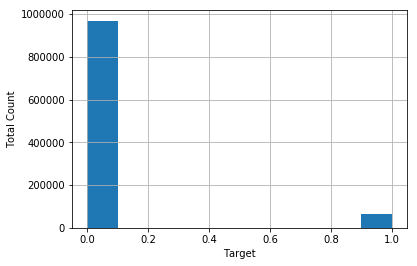

In [7]:
plt.xlabel("Target")
plt.ylabel("Total Count")
df_train['target'].hist()

## <font color="Red">Implementing the models to predict the accuracy</font>

 ### <font color="Green">1. Decision Tree</font>

In [8]:
import string
import nltk
nltk.download('stopwords')
eng_stopwords = set(stopwords.words("english")) #used to extract stop words like 'is', 'there', etc from lib nltk

from sklearn import tree
from sklearn.metrics import accuracy_score

#eng_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <font color="orange">Feature Columns Setting</font>

### Let Extract metadata from feature columns to gain meaningful insights

In [9]:
## Number of words in the text ##
df_train["num_words"] = df_train["question_text"].apply(lambda x: len(str(x).split()))
df_test["num_words"] = df_test["question_text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df_train["num_unique_words"] = df_train["question_text"].apply(lambda x: len(set(str(x).split())))
df_test["num_unique_words"] = df_test["question_text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df_train["num_chars"] = df_train["question_text"].apply(lambda x: len(str(x)))
df_test["num_chars"] = df_test["question_text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df_train["num_stopwords"] = df_train["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_test["num_stopwords"] = df_test["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
df_train["num_punctuations"] =df_train['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
df_test["num_punctuations"] =df_test['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df_train["num_words_upper"] = df_train["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_test["num_words_upper"] = df_test["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df_train["num_words_title"] = df_train["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_test["num_words_title"] = df_test["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df_train["mean_word_len"] = df_train["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test["mean_word_len"] = df_test["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [10]:
df_train.head(2)

,qid,question_text,target,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,00002165364db923c7e6,"Who is the best, Sunil Gavaskar or Kapil Dev?",0,9,9,45,4,2,0,5,4.111111
1,ca6b442cfc7da8685589,Can I use internet for help to write code in I...,0,12,12,58,6,1,2,2,3.916667


In [11]:
df_test.head(2)

,qid,question_text,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...,24,18,119,10,5,2,6,4.000
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?,8,8,40,4,1,0,2,4.125


C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


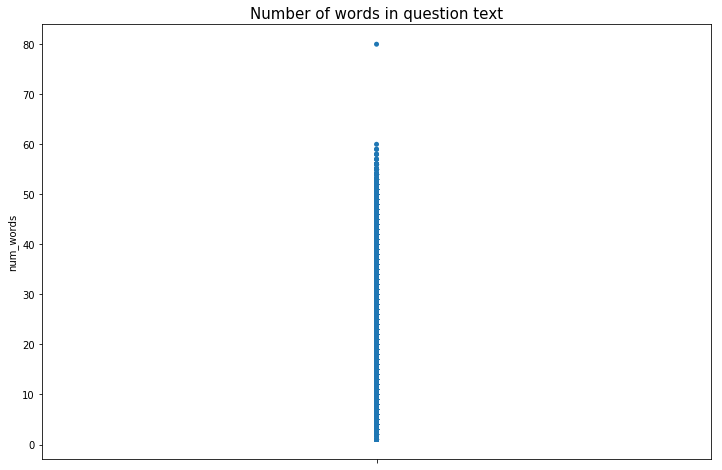

In [12]:
df_train['num_words'].loc[df_train['num_words']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.stripplot(y='num_words', data=df_train)
plt.title("Number of words in question text", fontsize=15)
plt.show()

In [13]:
df_test

,qid,question_text,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...,24,18,119,10,5,2,6,4.000000
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?,8,8,40,4,1,0,2,4.125000
2,000227734433360e1aae,What are the best made pocket knives under $20...,9,9,52,4,3,0,1,4.888889
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...,27,25,149,9,2,0,2,4.555556
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?,7,7,48,4,1,0,2,6.000000
5,000a2d30e3ffd70c070d,How well are you adapting to the Trump era?,9,9,43,5,1,0,2,3.888889
6,000b67672ec9622ff761,What should be the last thing people do in life?,10,10,48,6,1,0,1,3.900000
7,000b7fb1146d712c1105,Received conditional offer for Masters in Inte...,18,18,124,7,3,2,8,5.944444
8,000d665a8ddc426a1907,What does appareils photo mean in French?,7,7,41,3,1,0,2,5.000000
9,000df6fd2229447b2969,Is there a system of Public Interest Litigatio...,11,11,64,5,3,1,5,4.909091


In [14]:
#y_train= df_train['qid'].values
#y_test=  df_test['qid'].values
y_train= df_train['target'].values
X_train=df_train.drop(['qid','question_text','target'],axis=1)
X_test=df_test.drop(['qid','question_text'],axis=1)

### Training the Model

In [15]:
from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
my_tree_one

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [16]:
my_tree_one.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### feature Importance value

In [17]:
list(zip(X_train.columns,my_tree_one.feature_importances_))

[('num_words', 0.0),
 ('num_unique_words', 0.0),
 ('num_chars', 0.6158981722695697),
 ('num_stopwords', 0.0),
 ('num_punctuations', 0.014716962404121403),
 ('num_words_upper', 0.24088811382442732),
 ('num_words_title', 0.1284967515018817),
 ('mean_word_len', 0.0)]

In [18]:
# The accuracy of the model
print(my_tree_one.score(X_train, y_train))

0.9381766152851283


In [19]:
# Predictions from Decision Tree Model
y_pred = my_tree_one.predict(X_test)

 ### <font color="Green">2. Random Forest</font>

In [20]:
# Building and fitting Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_one = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 1)

# Fitting the model on Train Data
my_forest = forest_one.fit(X_train, y_train)

In [21]:
# Print the accuracy score of the fitted random forest
print(my_forest.score(X_train, y_train))

0.9383847487538614


In [22]:
# Making predictions of test data
pred_for = my_forest.predict(X_test)

In [23]:
list(zip(X_train.columns,my_forest.feature_importances_))

[('num_words', 0.09828691032248027),
 ('num_unique_words', 0.12516168781060208),
 ('num_chars', 0.22536540219459014),
 ('num_stopwords', 0.06814608718080814),
 ('num_punctuations', 0.04056814705818677),
 ('num_words_upper', 0.15779252918738934),
 ('num_words_title', 0.18139140465890524),
 ('mean_word_len', 0.10328783158703819)]

 ### <font color="Green">3. Grid Search</font>

In [24]:
# Different parameters we want to test

max_depth = [3,5,7] 
criterion = ['gini', 'entropy']

In [25]:
# Importing GridSearch
from sklearn.grid_search import GridSearchCV

# Building the model
my_tree_two = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator = my_tree_two, cv=3, 
                    param_grid = dict(max_depth = max_depth, criterion = criterion))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [26]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [27]:
# Best accuracy score
grid.best_score_

0.9382027529765506

In [28]:
# Best params for the model
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [29]:
# Building the model based on new parameters
my_tree_two = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 7, random_state=42)
my_tree_two.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [30]:
# Accuracy Score for new model
my_tree_two.score(X_train,y_train)

0.938232762918554

### <font color="Green">5. Naive Bayes</font>

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [32]:
stopset=set(stopwords.words("english"))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)

In [33]:
x_fit=vectorizer.fit_transform(X_train)

In [34]:
mnb=MultinomialNB()
model=mnb.fit(X_train,y_train)

In [35]:
y_prd=model.predict(X_test)

In [41]:
model.score(X_train,y_train)

0.935765171235761

### Conclusion : All the above algorithms have accuracy score 94%